In [26]:
%matplotlib notebook

In [83]:
import tdt
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl

from JM_general_functions import *
from JM_custom_figs import *

### Change this to the filename you want to analyse

In [5]:
file = 'R:\\DA_and_Reward\\gc214\\dPP1\\tdt files\\08042019\\Giulia-190408-093042'
file = 'C:\\Raw Data Files\\Giulia-190408-093042'

### This line will read the file and can be modified to include less

In [6]:
data = tdt.read_block(file)

Found Synapse note file: C:\Raw Data Files\Giulia-190408-093042\Notes.txt
read from t=0s to t=1968.4s


In [15]:
ttls = vars(data.epocs)
print('TTLs = ', ttls.keys())

sigs = vars(data.streams)
print('Signals = ', sigs.keys())


TTLs =  dict_keys(['Tick', 'LT1_', 'LL1_', 'RT2_', 'RL2_'])
Signals =  dict_keys(['D4B2', 'D3B2', 'D2B2', 'D1B2', 'Fi2r'])


### To choose between box 1 and Box 2 and between different cohorts (where signals and TTLs are named differently), you will have to alter the names of the values here. Hint - all the values in the TDT file are printed above

In [59]:
# For Box 1
LickL = 'LL1_'
LickR = 'RL1_'
SipperL = 'LT1_'
SipperR = 'RT1_'

SigBlue = 'D1B2'
SigUV = 'D2B2'

# For Box 2
Lick_L = 'LL2_'
Lick_R = 'RL2_'
Sipper_L = 'LT2_'
Sipper_R = 'RT2_'

SigBlue = 'D3B2'
SigUV = 'D4B2'

In [36]:
tmp = getattr(data.streams, SigBlue)
fs = tmp.fs
blue = tmp['data']

tmp2 = getattr(data.streams, SigUV)
uv = tmp2['data']

<IPython.core.display.Javascript object>


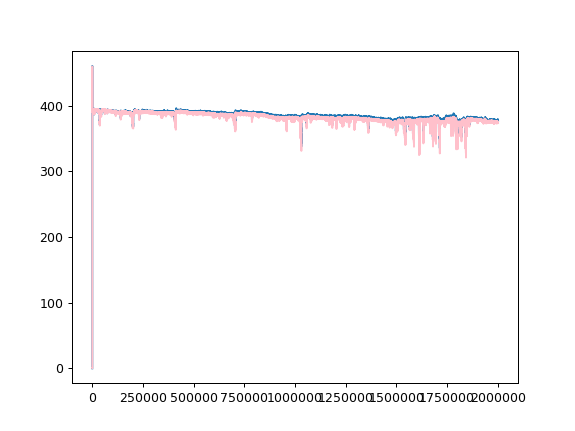

In [38]:
f, ax = plt.subplots()
ax.plot(blue)
ax.plot(uv, 'pink');

### Helper functions for extracting data

In [50]:
tick = ttls['Tick'].onset # If this fails need to write new code to deal with files without Tick

In [51]:
maxsamples = len(tick)*int(fs)
if (len(blue) - maxsamples) > 2*int(fs):
    print('Something may be wrong with conversion from time to samples')
    print(str(len(data) - maxsamples) + ' samples left over. This is more than double fs.')
    t2sMap = np.linspace(min(tick), max(tick), maxsamples)
else:
    t2sMap = np.linspace(min(tick), max(tick), maxsamples)

In [52]:
def event2sample(t2sMap, EOI):
    idx = (np.abs(self.t2sMap - EOI)).argmin()   
    return idx

In [ ]:
def check4events(self):
    try:
        lt = getattr(ttls, self.ttl_trialsL)
        self.left['exist'] = True
        self.left['sipper'] = lt.onset
        self.left['sipper_off'] = lt.offset
        ll = getattr(self.output, self.ttl_licksL)
        self.left['licks'] = np.array([i for i in ll.onset if i<max(self.left['sipper_off'])])
        self.left['licks_off'] = ll.offset[:len(self.left['licks'])]
    except AttributeError:
        self.left['exist'] = False
        self.left['sipper'] = []
        self.left['sipper_off'] = []
        self.left['licks'] = []
        self.left['licks_off'] = []

    try:
        rt = getattr(self.output, self.ttl_trialsR)
        self.right['exist'] = True
        self.right['sipper'] = rt.onset
        self.right['sipper_off'] = rt.offset
        rl = getattr(self.output, self.ttl_licksR)
        self.right['licks'] = np.array([i for i in rl.onset if i<max(self.right['sipper_off'])])
        self.right['licks_off'] = rl.offset[:len(self.right['licks'])]
    except AttributeError:
        self.right['exist'] = False
        self.right['sipper'] = []
        self.right['sipper_off'] = []
        self.right['licks'] = []
        self.right['licks_off'] = []

    if self.left['exist'] == True and self.right['exist'] == True:
        try:
            first = findfreechoice(self.left['sipper'], self.right['sipper'])
            self.both['sipper'] = self.left['sipper'][first:]
            self.both['sipper_off'] = self.left['sipper_off'][first:]
            self.left['sipper'] = self.left['sipper'][:first-1]
            self.left['sipper_off'] = self.left['sipper_off'][:first-1]
            self.right['sipper'] = self.right['sipper'][:first-1]
            self.right['sipper_off'] = self.right['sipper_off'][:first-1]
            self.left['licks-forced'], self.left['licks-free'] = dividelicks(self.left['licks'], self.both['sipper'][0])
            self.right['licks-forced'], self.right['licks-free'] = dividelicks(self.right['licks'], self.both['sipper'][0])
            self.left['nlicks-forced'] = len(self.left['licks-forced'])
            self.right['nlicks-forced'] = len(self.right['licks-forced'])
            self.left['nlicks-free'] = len(self.left['licks-free'])
            self.right['nlicks-free'] = len(self.right['licks-free'])

        except IndexError:
            print('Problem separating out free choice trials')
    else:
        self.left['licks-forced'] = self.left['licks']
        self.right['licks-forced'] = self.right['licks']

In [75]:
left={}
try:
    lt = ttls[SipperL]
    left['exist'] = True
    left['sipper'] = lt.onset
    left['sipper_off'] = lt.offset
    ll = ttls[LickL]
    left['licks'] = np.array([i for i in ll.onset if i<max(left['sipper_off'])])
    left['licks_off'] = ll.offset[:len(left['licks'])]
except KeyError:
    left['exist'] = False
    left['sipper'] = []
    left['sipper_off'] = []
    left['licks'] = []
    left['licks_off'] = []
    
right={}
try:
    rt = ttls[SipperR]
    right['exist'] = True
    right['sipper'] = rt.onset
    right['sipper_off'] = rt.offset
    rl = ttls[LickR]
    right['licks'] = np.array([i for i in rl.onset if i<max(right['sipper_off'])])
    right['licks_off'] = rl.offset[:len(right['licks'])]
except KeyError:
    right['exist'] = False
    right['sipper'] = []
    right['sipper_off'] = []
    right['licks'] = []
    right['licks_off'] = []

In [74]:
# May need to add this in if we want to separate forced and free trials
# if self.left['exist'] == True and self.right['exist'] == True:
#     try:
#         first = findfreechoice(self.left['sipper'], self.right['sipper'])
#         self.both['sipper'] = self.left['sipper'][first:]
#         self.both['sipper_off'] = self.left['sipper_off'][first:]
#         self.left['sipper'] = self.left['sipper'][:first-1]
#         self.left['sipper_off'] = self.left['sipper_off'][:first-1]
#         self.right['sipper'] = self.right['sipper'][:first-1]
#         self.right['sipper_off'] = self.right['sipper_off'][:first-1]
#         self.left['licks-forced'], self.left['licks-free'] = dividelicks(self.left['licks'], self.both['sipper'][0])
#         self.right['licks-forced'], self.right['licks-free'] = dividelicks(self.right['licks'], self.both['sipper'][0])
#         self.left['nlicks-forced'] = len(self.left['licks-forced'])
#         self.right['nlicks-forced'] = len(self.right['licks-forced'])
#         self.left['nlicks-free'] = len(self.left['licks-free'])
#         self.right['nlicks-free'] = len(self.right['licks-free'])

#     except IndexError:
#         print('Problem separating out free choice trials')
# else:
#     self.left['licks-forced'] = self.left['licks']
#     self.right['licks-forced'] = self.right['licks']

In [77]:
try:
    left['lickdata'] = lickCalc(left['licks'],
                      offset = left['licks_off'],
                      burstThreshold = 0.50)
except IndexError:
    left['lickdata'] = 'none'

try:
    right['lickdata'] = lickCalc(right['licks'],
              offset = right['licks_off'],
              burstThreshold = 0.50)
except IndexError:
    right['lickdata'] = 'none'

In [78]:
# Could alter this code to set colors for each bottle and maybe work out which is casein
left['color'] = 'green'
right['color'] = 'blue'

In [86]:
def sessionlicksFig(ax):
    if left['exist'] == True:
        licks = left['lickdata']['licks']
        ax.hist(licks, range(0, 3600, 60), color=left['color'], alpha=0.4)          
        yraster = [ax.get_ylim()[1]] * len(licks)
        ax.scatter(licks, yraster, s=50, facecolors='none', edgecolors=left['color'])

    if right['exist'] == True:
        licks = right['lickdata']['licks']
        ax.hist(licks, range(0, 3600, 60), color=right['color'], alpha=0.4)          
        yraster = [ax.get_ylim()[1]] * len(licks)
        ax.scatter(licks, yraster, s=50, facecolors='none', edgecolors=right['color'])           
    
    ax.set_xticks(np.multiply([0, 10, 20, 30, 40, 50, 60],60))
    ax.set_xticklabels(['0', '10', '20', '30', '40', '50', '60'])
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Licks per min')

In [89]:
def behavFigsCol(gs1, col, side):
    ax = plt.subplot(gs1[1, col])
    licklengthFig(ax, side['lickdata'], color=side['color'])
    
    ax = plt.subplot(gs1[2, col])
    iliFig(ax, side['lickdata'], color=side['color'])
    
    ax = plt.subplot(gs1[3, col])
    cuerasterFig(ax, side['sipper'], side['lickdata']['licks'])

<IPython.core.display.Javascript object>


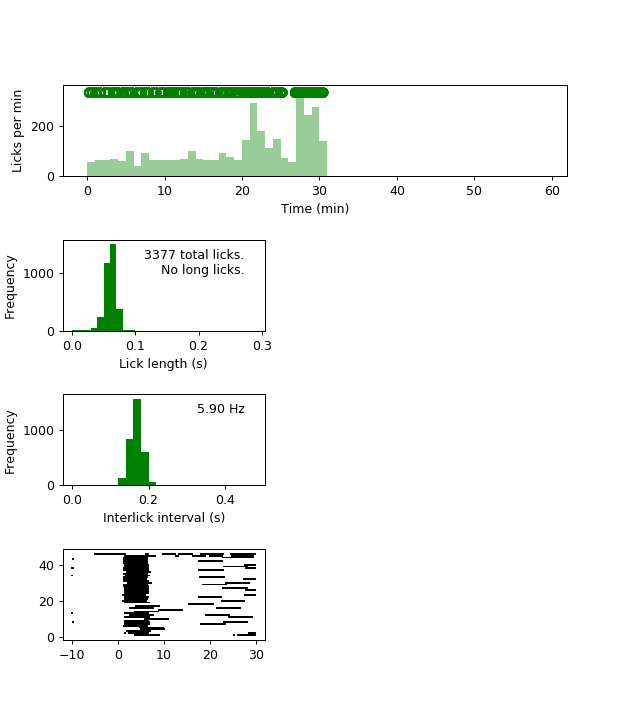

In [95]:
behavFig = plt.figure(figsize=(7,8))
gs1 = gridspec.GridSpec(4, 2)
gs1.update(left=0.10, right= 0.9, wspace=0.5, hspace = 0.7)

ax = plt.subplot(gs1[0, :])
sessionlicksFig(ax)

if left['exist'] == True:
    behavFigsCol(gs1, 0, left)

if right['exist'] == True:
    behavFigsCol(gs1, 1, right)

# ax = plt.subplot(gs1[4, 0])
# jmfig.latencyFig(ax, x)

In [96]:
bins = 300

randomevents = makerandomevents(120, max(tick)-120)
bgTrials, pps = snipper(blue, randomevents,
                                t2sMap = t2sMap, fs = fs, bins=bins)

In [97]:
for side in [left, right]:   
    if side['exist'] == True:
        side['snips_sipper'] = jmf.mastersnipper(x, side['sipper'], peak_between_time=[0, 5])
        side['snips_licks'] = jmf.mastersnipper(x, side['lickdata']['rStart'], peak_between_time=[0, 2])
        try:
            timelock_events = [licks for licks in side['lickdata']['rStart'] if licks in side['licks-forced']]
            latency_events = side['sipper']
            side['snips_licks_forced'] = jmf.mastersnipper(x, timelock_events, peak_between_time=[0, 2],
                                                            latency_events=latency_events, latency_direction='pre')
        except KeyError:
            pass
        try:
            side['lats'] = jmf.latencyCalc(side['lickdata']['licks'], side['sipper'], cueoff=side['sipper_off'], lag=0)
        except TypeError:
            print('Cannot work out latencies as there are lick and/or sipper values missing.')
            side['lats'] = []

NameError: name 'x' is not defined